![title](autoencoder_1.png)



In [3]:
import torch
import torchvision.transforms as transforms
import numpy as np
from torchvision import datasets

transform = transforms.ToTensor()
    

train_data = datasets.MNIST(root = 'data', train = True, download=True, transform = transform)
test_data = datasets.MNIST(root = 'data', train = False, download =True, transform = transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=20)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=20)


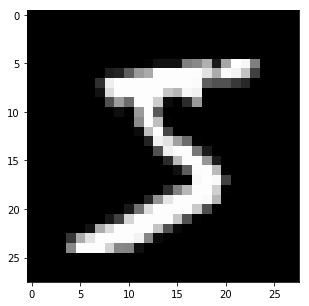

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

images, labels = next(iter(train_loader))

images = images.numpy()

img = np.squeeze(images[0])

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.imshow(img, cmap = 'gray')

In [21]:
import torch.nn as nn
import torch.nn.functional as F

class ConvAutoEncoder(nn.Module):
    def __init__(self):
        super(ConvAutoEncoder, self).__init__()
        #Encoder layers
        self.fc1 = nn.Conv2d(1, 16, 3, padding=1)
        self.fc2 = nn.Conv2d(16, 4, 3, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        
        #Decoder
        self.decoder = nn.ConvTranspose2d(4, 16, 2, stride= 2)
        self.decoder2 = nn.ConvTranspose2d(16, 1, 2, stride=2)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.pool(x)
        x = F.relu(self.fc2(x))
                   
        x = self.pool(x)
        
        x = F.relu(self.decoder(x))
        
        x = F.sigmoid(self.decoder2(x))
        
        return x
        
        

In [22]:
model = ConvAutoEncoder()
print(model)

ConvAutoEncoder(
  (fc1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc2): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (decoder): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
  (decoder2): ConvTranspose2d(16, 1, kernel_size=(2, 2), stride=(2, 2))
)


In [23]:
criterion = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

training_on_gpu = torch.cuda.is_available()

training_on_gpu

True

In [34]:
epoch = 20

for epoch in range(1, epoch+1):
    train_loss = 0.0
    
    for data in train_loader:
        
        images, labels = data
        
        optimizer.zero_grad()
        
        output = model(images)
        
        loss = criterion(output, images)
        
        loss.backward()
        
        optimizer.step()
        
        train_loss += loss.item() * images.size(0)
    
    train_loss = train_loss / len(train_loader)
    
    print('Epoch {} --> Loss {}'.format(epoch, train_loss))
        
    

C:\Anaconda\lib\site-packages\torch\nn\functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 1 --> Loss 1.7179937377572059
Epoch 2 --> Loss 0.3760549253597856
Epoch 3 --> Loss 0.32891619761784874
Epoch 4 --> Loss 0.3106422948402663
Epoch 5 --> Loss 0.29981589861835045
Epoch 6 --> Loss 0.29253162202114863
Epoch 7 --> Loss 0.28718170429890355
Epoch 8 --> Loss 0.2830506022150318
Epoch 9 --> Loss 0.2796933760183553
Epoch 10 --> Loss 0.27684932939708234
Epoch 11 --> Loss 0.27436820935457945
Epoch 12 --> Loss 0.272197253163904
Epoch 13 --> Loss 0.27027088900407154
Epoch 14 --> Loss 0.26853572400286796
Epoch 15 --> Loss 0.2669381021956603
Epoch 16 --> Loss 0.2653778346379598
Epoch 17 --> Loss 0.26381295764818785
Epoch 18 --> Loss 0.2623920152274271
Epoch 19 --> Loss 0.2610850052783887
Epoch 20 --> Loss 0.2598557186623414


C:\Anaconda\lib\site-packages\torch\nn\functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


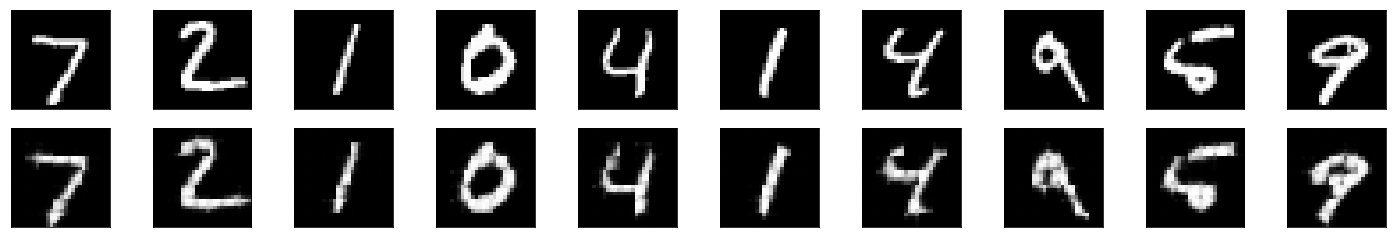

In [35]:
dataiter = iter(test_loader)

images, labels = dataiter.next()

output = model(images)


images= images.numpy()

output = output.view(20, 1, 28, 28)
output = output.detach().numpy()

fig, axes = plt.subplots(nrows=2, ncols=10, sharex =True, sharey = True, figsize= (25,4))


for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap = 'gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)